In [ ]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

In [0]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

In [ ]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

In [ ]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [1]:
from numpy import *
import matplotlib.pylab as plt

In [2]:
def loadDataSet(fileName):
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(2):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

In [3]:
def standRegres(xArr,yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    xTx = xMat.T * xMat
    if linalg.det(xTx) == 0:
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws

In [4]:
def regression1():
    xArr, yArr = loadDataSet("./data/data.txt")
    xMat = mat(xArr)
    yMat = mat(yArr)
    ws = standRegres(xArr, yArr)
    fig = plt.figure()
    ax = fig.add_subplot(111)               #add_subplot(349)函数的参数的意思是，将画布分成3行4列图像画在从左到右从上到下第9块
    ax.scatter(xMat[:, 1].flatten().tolist(), yMat.T[:, 0].flatten().A[0].tolist()) #scatter 的x是xMat中的第二列，y是yMat的第一列
    xCopy = xMat.copy()
    xCopy.sort(0)
    yHat = xCopy * ws
    ax.plot(xCopy[:, 1], yHat)
    plt.show()

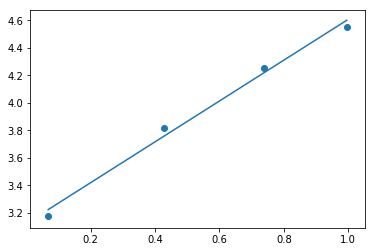

In [5]:
if __name__ == "__main__":
    regression1()